# Project Contributor
**Vivek Shivakumar**


In [ ]:
# Download images directly into Colab with updated URLs
!wget -O cat1.jpg https://images.unsplash.com/photo-1574158622682-e40e69881006
!wget -O cat2.jpg https://images.unsplash.com/photo-1543852786-1cf6624b9987?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwzNjUyOXwwfDF8c2VhcmNofDR8fGNhdHxlbnwwfHx8fDE2MzUyNTUwNjM&ixlib=rb-1.2.1&q=80&w=400
!wget -O dog1.jpg https://images.unsplash.com/photo-1517849845537-4d257902454a
!wget -O dog2.jpg https://images.unsplash.com/photo-1525253086316-d0c936c814f8
!wget -O car1.jpg https://images.unsplash.com/photo-1493238792000-8113da705763
!wget -O car2.jpg https://images.unsplash.com/photo-1502877338535-766e1452684a
!wget -O flower1.jpg https://images.unsplash.com/photo-1501004318641-b39e6451bec6
!wget -O flower2.jpg https://images.unsplash.com/photo-1520763185298-1b434c919102?q=80&w=1632&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O bird1.jpg https://images.unsplash.com/photo-1486365227551-f3f90034a57c?q=80&w=1740&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
!wget -O bird2.jpg https://images.unsplash.com/photo-1494247622028-9a5bbfbf529a?q=80&w=1744&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D



--2024-11-03 18:38:56--  https://images.unsplash.com/photo-1574158622682-e40e69881006
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 900980 (880K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 879.86K  --.-KB/s    in 0.02s   

2024-11-03 18:38:56 (56.4 MB/s) - ‘cat1.jpg’ saved [900980/900980]

--2024-11-03 18:38:56--  https://images.unsplash.com/photo-1543852786-1cf6624b9987?crop=entropy
Resolving images.unsplash.com (images.unsplash.com)... 151.101.2.208, 151.101.66.208, 151.101.130.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.2.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5517104 (5.3M) [image/jpeg]
Saving to: ‘cat2.jpg’

cat2.jpg            100%[===================>]   5.26M  --.-KB/s  

In [ ]:
!ls


bird1.jpg  car1.jpg  cat1.jpg  dog1.jpg  flower1.jpg  sample_data
bird2.jpg  car2.jpg  cat2.jpg  dog2.jpg  flower2.jpg


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def attack_image(image_path, epsilon=0.03):
    # Load the image
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Generate random noise
    noise = torch.randn(image_tensor.size()) * epsilon
    adversarial_image = image_tensor + noise
    adversarial_image = torch.clamp(adversarial_image, 0, 1)  # Ensure values are within [0, 1]

    # Convert to PIL for displaying
    adv_image_pil = transforms.ToPILImage()(adversarial_image.squeeze())

    # Display the original and adversarial images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(image)
    ax1.set_title("Original Image")
    ax2.imshow(adv_image_pil)
    ax2.set_title("Adversarial Image")
    plt.show()

In [ ]:
# List of images to attack
image_files = ['cat1.jpg', 'cat2.jpg', 'dog1.jpg', 'dog2.jpg', 'car1.jpg', 'car2.jpg', 'flower1.jpg', 'flower2.jpg', 'bird1.jpg', 'bird2.jpg']


Applying attack on cat1.jpg


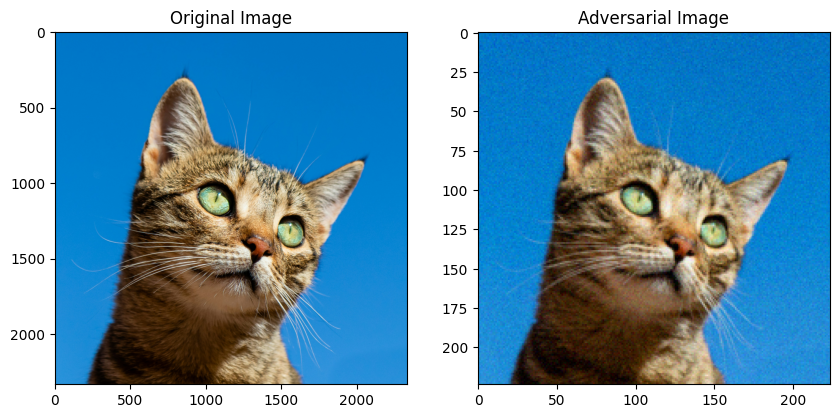

Applying attack on cat2.jpg


Applying attack on dog1.jpg


Applying attack on dog2.jpg


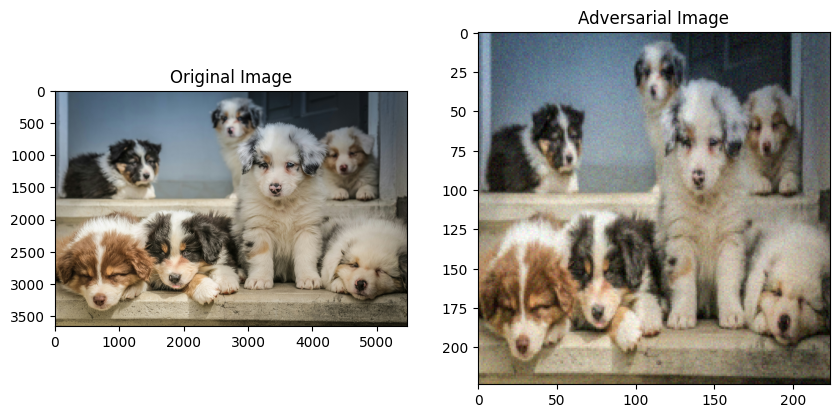

Applying attack on car1.jpg


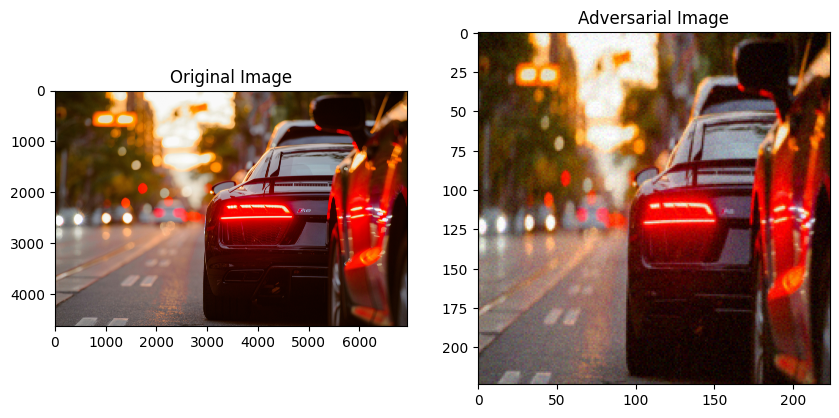

Applying attack on car2.jpg


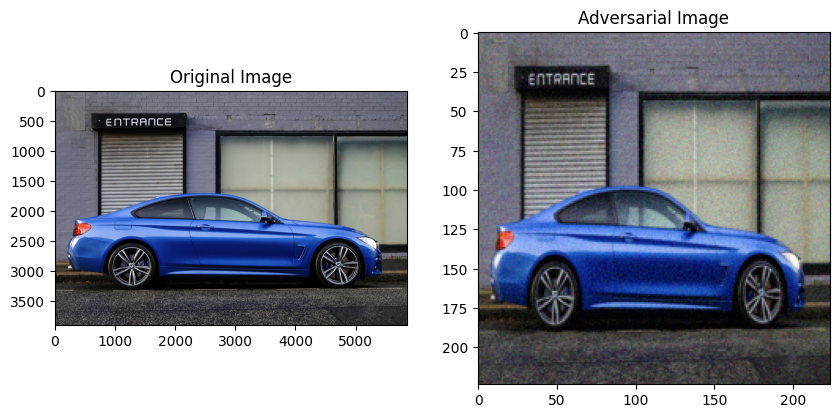

Applying attack on flower1.jpg


Applying attack on flower2.jpg


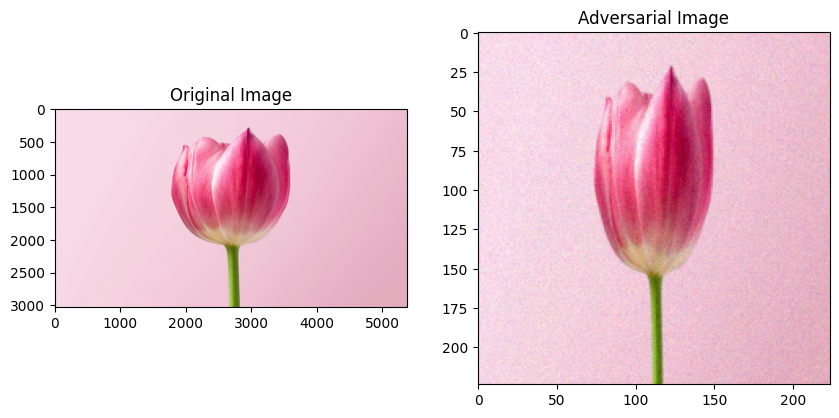

Applying attack on bird1.jpg


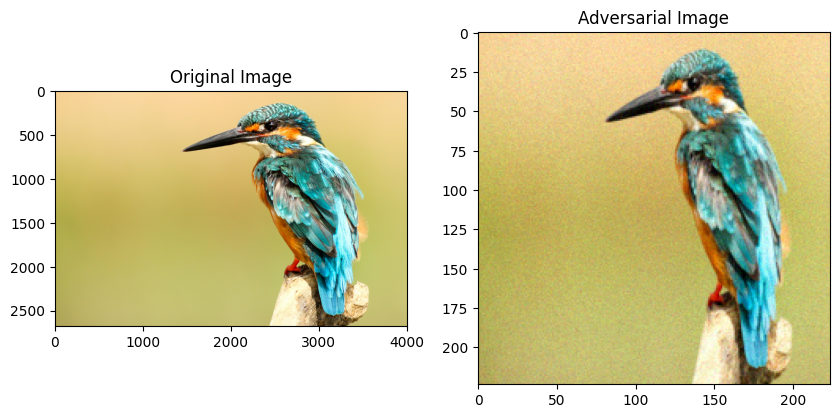

Applying attack on bird2.jpg


In [ ]:
# Apply adversarial attack to each image
for image_file in image_files:
    image_path = f'./{image_file}'
    print(f"Applying attack on {image_file}")
    attack_image(image_path, epsilon=0.03)  # Adjust epsilon as needed

### Summary of Results

In this experiment, we applied an adversarial attack to a set of images belonging to five different categories: cats, dogs, cars, flowers, and birds. The attack involved adding controlled random noise to each image, with the aim of subtly altering the pixel values in a way that makes the images more challenging for a classification model to accurately recognize.

The original and adversarial images are displayed side-by-side for each class to visually compare the effect of the attack. For each pair:
- The left image is the original version, and
- The right image is the adversarially altered version.

This experiment demonstrates the sensitivity of neural networks to adversarial noise and highlights the need for improved model robustness in real-world applications where security and reliability are critical.
